In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df=pd.read_csv('Week7_train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.shape

(42000, 785)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


4


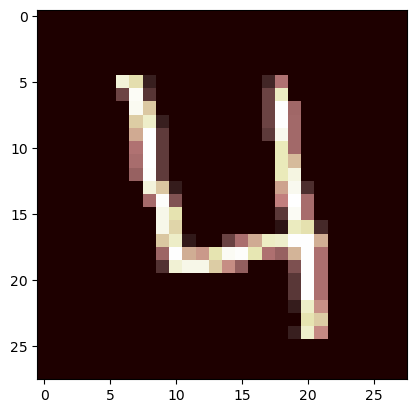

In [48]:


plt.imshow(df.iloc[3,1:].values.reshape(28,28),cmap='pink')
print(df.iloc[3,0])

In [37]:
subset=df.sample(frac=0.10)

print(subset.shape)



(4200, 785)


In [39]:
subset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23931,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30191,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1126,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34223,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8791,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
unique_labels=subset['label'].nunique()
unique_labels

10

In [52]:
val_cou=subset['label'].value_counts()
val_cou

label
1    505
7    480
3    436
6    422
2    408
5    394
8    391
4    390
9    387
0    387
Name: count, dtype: int64

In [54]:
X=subset.iloc[:,1:] #X=subset.drop('label',axis=1)
Y=subset.iloc[:,0]  #Y=subset['label']

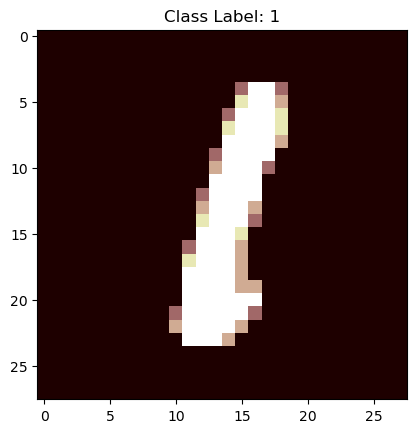

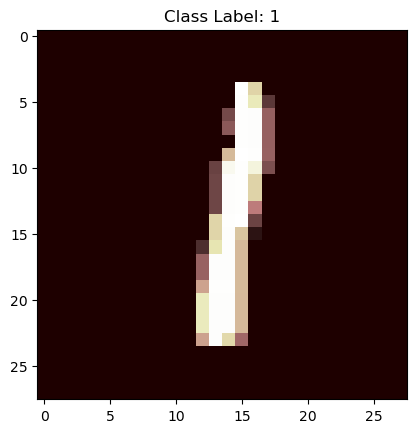

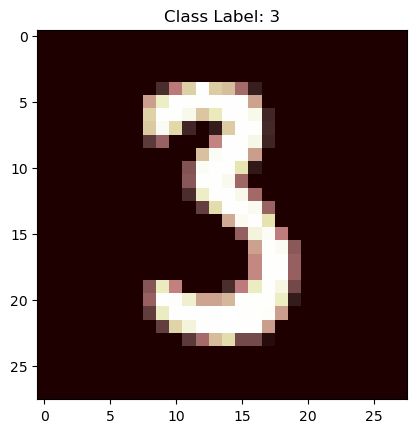

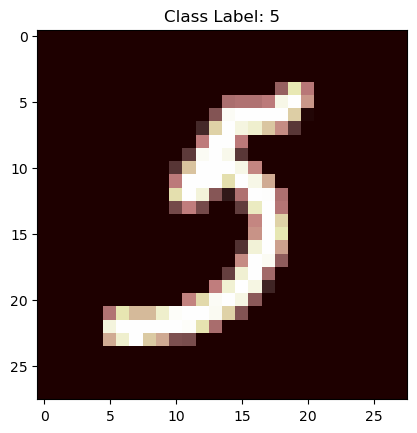

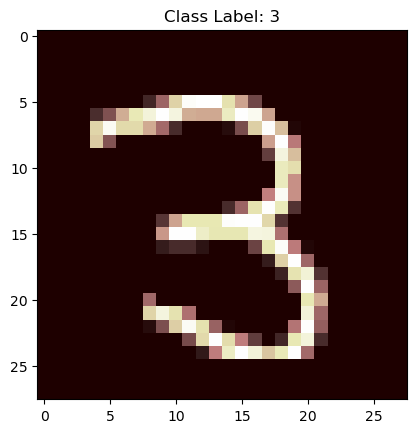

In [102]:
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='pink')
    plt.title(f'Class Label: {Y.iloc[i]}')
    plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.25)


In [70]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [72]:
Y_pred=model.predict(X_val)

In [86]:
from sklearn.metrics import  confusion_matrix,classification_report
conf_mat=confusion_matrix(Y_val,Y_pred)

In [84]:
print(conf_mat)

[[ 90   0   0   0   0   0   0   0   0   0]
 [  0 120   0   0   0   0   0   0   1   0]
 [  1   5  94   2   1   0   2   5   0   0]
 [  0   2   1 108   1   2   0   2   0   1]
 [  0   4   0   0  97   0   0   1   0   9]
 [  1   2   0   7   0  78   3   0   0   2]
 [  1   0   0   0   1   0 105   0   1   0]
 [  0   4   1   0   0   0   0 111   0   4]
 [  2   5   1   1   1   5   0   1  77   3]
 [  0   0   0   1   1   2   0   2   1  77]]


In [88]:
class_report=classification_report(Y_val,Y_pred)

In [90]:

print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       0.85      0.99      0.91       121
           2       0.97      0.85      0.91       110
           3       0.91      0.92      0.92       117
           4       0.95      0.87      0.91       111
           5       0.90      0.84      0.87        93
           6       0.95      0.97      0.96       108
           7       0.91      0.93      0.92       120
           8       0.96      0.80      0.88        96
           9       0.80      0.92      0.86        84

    accuracy                           0.91      1050
   macro avg       0.91      0.91      0.91      1050
weighted avg       0.92      0.91      0.91      1050



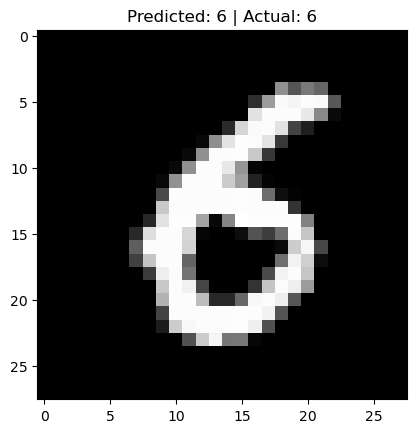

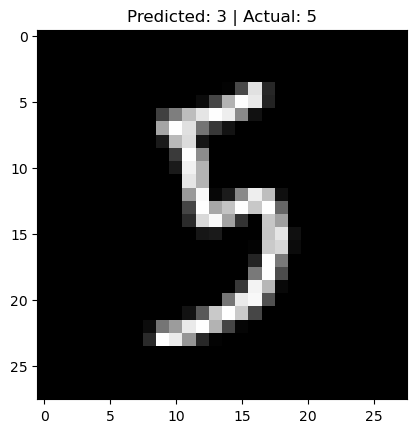

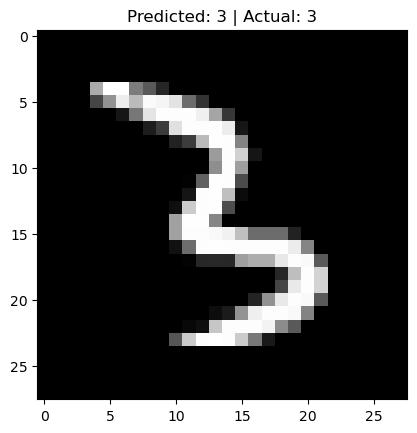

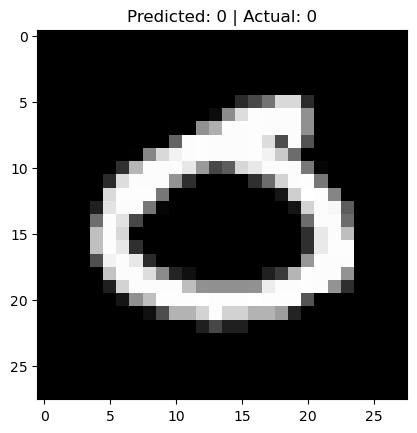

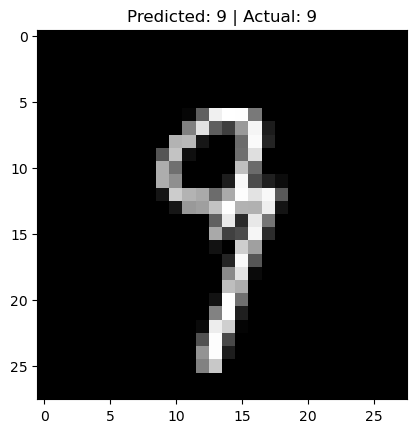

In [104]:
for i in range(5):
    plt.imshow(X_val.iloc[i].values.reshape(28, 28), cmap='gray')
    
    plt.title(f'Predicted: {Y_pred[i]} | Actual: {Y_val.iloc[i]}')
    
    plt.show()
